**## The Code runtime is around 1 hours.**

Data sources:

https://www.kaggle.com/datasets/ruchi798/source-based-news-classification

https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?resource=download

https://www.kaggle.com/datasets/mrisdal/fake-news



# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# **Import Data Sets**
## Column: title, text, label

In [2]:
df1=pd.read_csv("Fake.csv")
df1.drop(axis=0, index=df1.index[-15000:], inplace=True)
df1 = df1[['title', 'text']]
df1['label'] = 0
print(df1.info())
# print(df1.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   8481 non-null   object
 1   text    8481 non-null   object
 2   label   8481 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 198.9+ KB
None


In [3]:
df2=pd.read_csv("True.csv")
df2.drop(axis=0, index=df2.index[-10000:], inplace=True)
df2 = df2[['title', 'text']]
df2['label'] = 1
print(df2.info())
# print(df2.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11417 entries, 0 to 11416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   11417 non-null  object
 1   text    11417 non-null  object
 2   label   11417 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 267.7+ KB
None


In [4]:
df3=pd.read_csv("news.csv")
df3 = df3[['title', 'text', 'label']]
df3['label'] = df3['label'].map({'FAKE':0 ,'REAL':1})
print(df3.info())
# print(df3.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 148.6+ KB
None


In [5]:
df4=pd.read_csv("news_articles.csv")
df4 = df4.dropna()
df4 = df4[['title', 'text', 'label']]
df4['label'] = df4['label'].map({'Fake':0 ,'Real':1})
print(df4.info())
# print(df4.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2045
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2045 non-null   object
 1   text    2045 non-null   object
 2   label   2045 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 63.9+ KB
None


In [6]:
# concatenating df1, df2, df3, df4 to df
df = pd.concat([df1,df2,df3, df4], axis=0)
print(df.info())

print('\nTotal of Fake data:', (df['label'] == 0).sum())
print('Total of Real data:', (df['label'] == 1).sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28278 entries, 0 to 2045
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   28278 non-null  object
 1   text    28278 non-null  object
 2   label   28278 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 883.7+ KB
None

Total of Fake data: 12936
Total of Real data: 15342


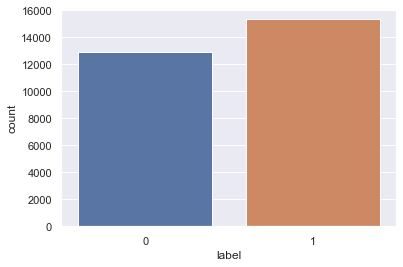

In [7]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='label', data=df)

# **Check null value**

<AxesSubplot:>

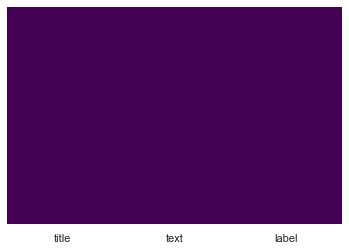

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

# **Set Up Train/Test Data**

In [10]:
labels = df['label']
df = df.drop(['label'], axis=1)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=42)

In [12]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (22622,)
X_test shape:  (5656,)


# **Transform the Data Set**

In [13]:
# Init the TfidfVectorizer function
vectorizer = TfidfVectorizer()

# Transform training data set
X_train = vectorizer.fit_transform(X_train) 

# Transform testing data set
X_test = vectorizer.transform(X_test)

# **Models**

Passive Aggressive Classifier

In [14]:
# Set paramaters
pac = PassiveAggressiveClassifier(max_iter=50, C = 0.5)

# training model
pac.fit(X_train, y_train)

# predicting
pac_pred = pac.predict(X_test)

# Display the accuracy score
pac_score = accuracy_score(y_test, pac_pred)

print('The confusion matrix is: ')
print(confusion_matrix(y_test, pac_pred))
print(f'\nThe accuracy score is: {round((pac_score)*100, 2)}%')
print('\nThe classification report is:\n', classification_report(y_test,pac_pred))

The confusion matrix is: 
[[2442  139]
 [ 132 2943]]

The accuracy score is: 95.21%

The classification report is:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2581
           1       0.95      0.96      0.96      3075

    accuracy                           0.95      5656
   macro avg       0.95      0.95      0.95      5656
weighted avg       0.95      0.95      0.95      5656



Gradient Boosting Classifier

In [15]:
#from sklearn.model_selection import GridSearchCV
gbrt = GradientBoostingClassifier(learning_rate=0.1, max_depth= 5, max_features='sqrt')
gbrt.fit(X_train, y_train)

# predicting
gbrt_pred = gbrt.predict(X_test)

# Display the accuracy score
gbrt_score = accuracy_score(y_test, gbrt_pred)

print('The confusion matrix is: ')
print(confusion_matrix(y_test, gbrt_pred))
print(f'\nThe accuracy score is: {round((gbrt_score)*100, 2)}%')
print('\nThe classification report is:\n', classification_report(y_test,gbrt_pred))

The confusion matrix is: 
[[2351  230]
 [ 208 2867]]

The accuracy score is: 92.26%

The classification report is:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      2581
           1       0.93      0.93      0.93      3075

    accuracy                           0.92      5656
   macro avg       0.92      0.92      0.92      5656
weighted avg       0.92      0.92      0.92      5656



Logistic Regression

In [16]:
# final Logistic Regression model
lgr_model = LogisticRegression(C = 1.5, penalty = "l2")
lgr_model.fit(X_train, y_train)
lgr_prediction = lgr_model.predict(X_test)

# Display the accuracy score
lgr_score = accuracy_score(y_test, lgr_prediction)

print('The confusion matrix is: ')
print(confusion_matrix(y_test, lgr_prediction))
print(f'\nThe accuracy score is: {round((lgr_score)*100, 2)}%')
print('\nThe classification report is:\n', classification_report(y_test,lgr_prediction))

The confusion matrix is: 
[[2460  121]
 [ 208 2867]]

The accuracy score is: 94.18%

The classification report is:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2581
           1       0.96      0.93      0.95      3075

    accuracy                           0.94      5656
   macro avg       0.94      0.94      0.94      5656
weighted avg       0.94      0.94      0.94      5656



Support Vector Classifier

In [17]:
SVM = svm.SVC(C=1.9, kernel='linear')
SVM.fit(X_train, y_train)

svm_prediction = SVM.predict(X_test)

# Display the accuracy score
svm_score = accuracy_score(y_test, svm_prediction)

print('The confusion matrix is: ')
print(confusion_matrix(y_test, svm_prediction))
print(f'\nThe accuracy score is: {round((svm_score)*100, 2)}%')
print('\nThe classification report is:\n', classification_report(y_test,svm_prediction))

The confusion matrix is: 
[[2471  110]
 [ 152 2923]]

The accuracy score is: 95.37%

The classification report is:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2581
           1       0.96      0.95      0.96      3075

    accuracy                           0.95      5656
   macro avg       0.95      0.95      0.95      5656
weighted avg       0.95      0.95      0.95      5656

